In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data_dir = f"{os.environ['MINERVA_HOME']}/data/premade_mil/minimum_10"
df = pd.read_json(f"{data_dir}/val.jsonl", lines=True)


Restructure data so instance text and scores are readily available.

In [3]:
data = []

def temp(row):
    for i in row["instances"]:
        data.append([
            row["bag_id"],
            row["label"],
            i["id_str"],
            i["tweet_text"],
            i["civil_unrest_score"],
            i["instance_score"]
        ])

df.apply(temp, axis="columns")
instance_df = pd.DataFrame(data, columns=["bag_id", "bag_label", "instance_id", "text", "instance_score_old", "instance_score"])


In [4]:
instance_df["country"] = instance_df["bag_id"].map(lambda x: x.split("_")[-1])

# Q1: Distribution of Instance Scores

- Overall
- By positive/negative bag
- By country

<IPython.core.display.Javascript object>


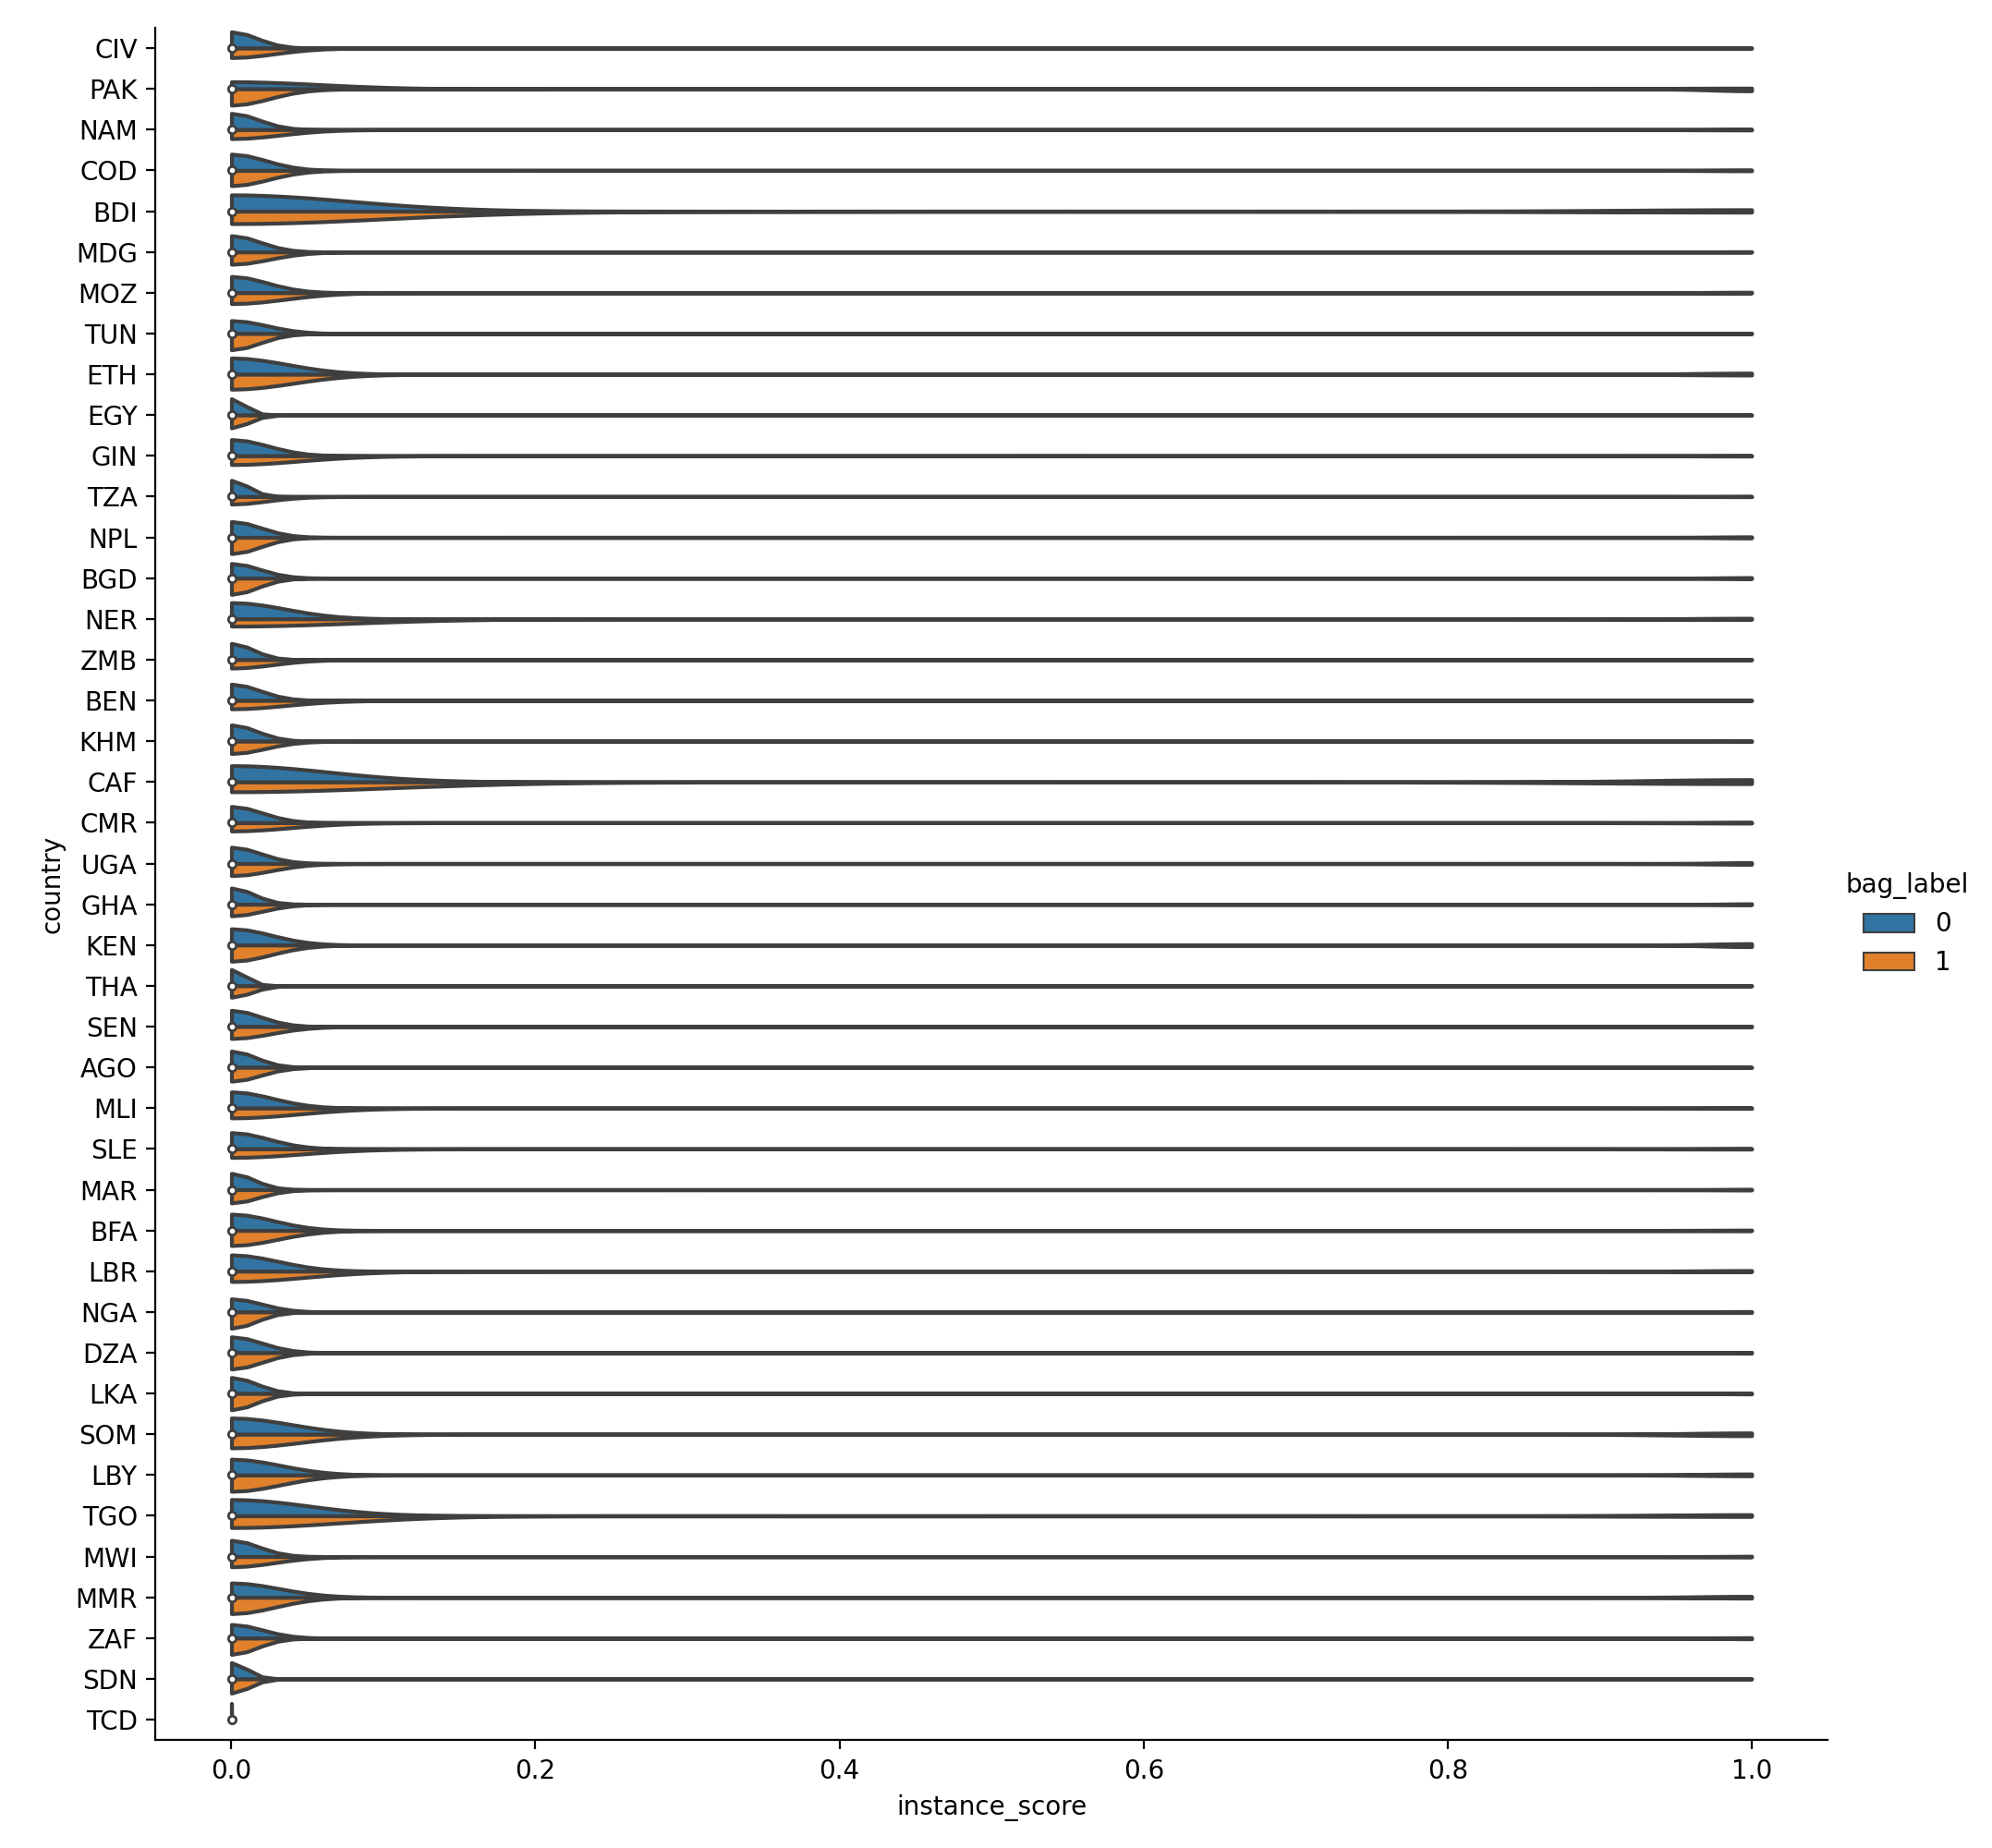

In [5]:
g = sns.catplot(
    instance_df,
    kind="violin",
    split=True,
    cut=0,
    x="instance_score",
    y="country",
    hue="bag_label",
    height=10,
    aspect=1
)

<IPython.core.display.Javascript object>


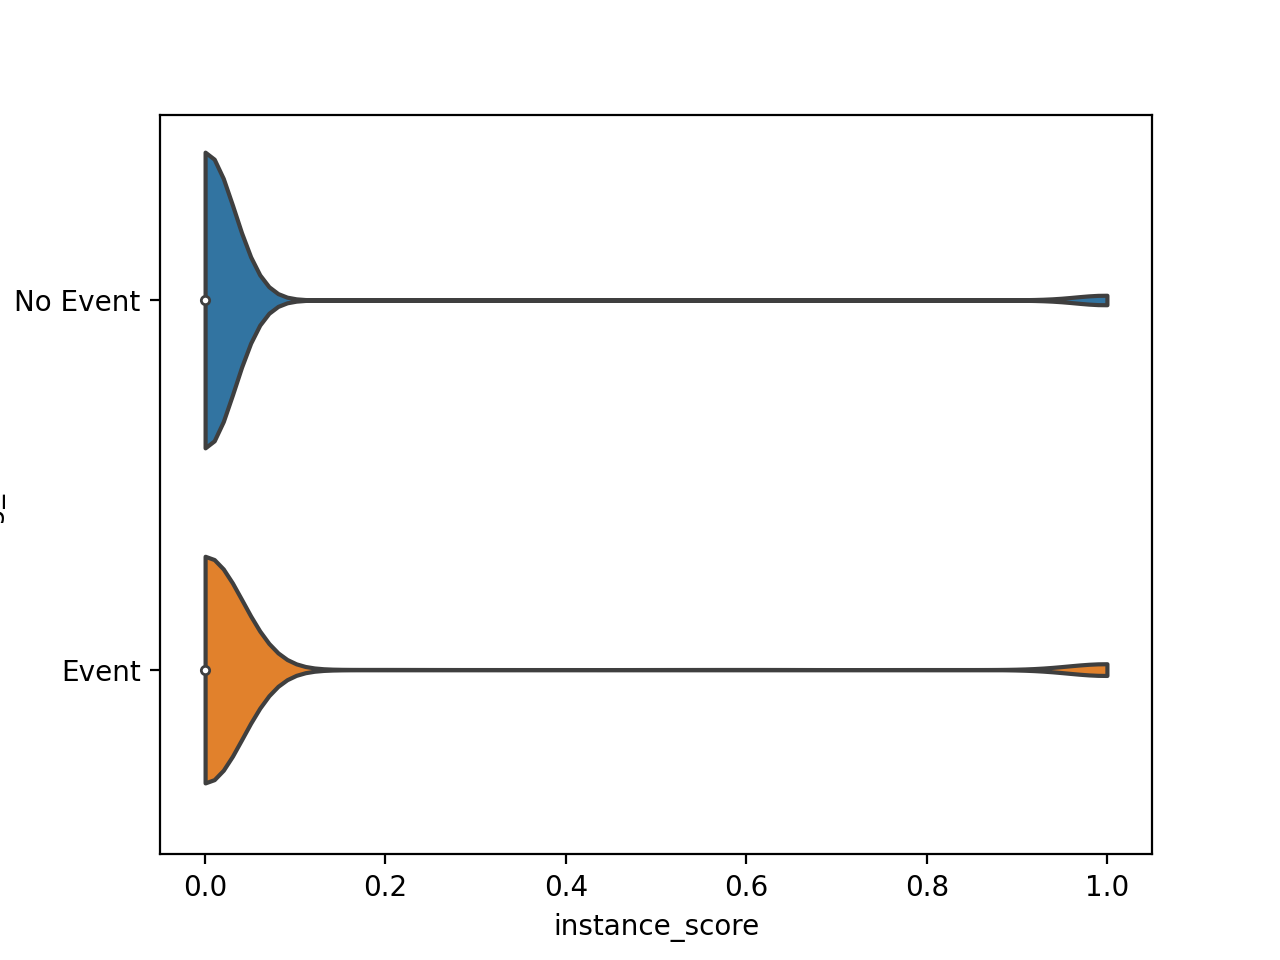

<AxesSubplot:xlabel='instance_score', ylabel='bag_name'>

In [13]:
# Create new figure
fig = plt.figure()
g2 = fig.gca()

# Too much to plot, sample and then run
instance_df["bag_name"] = instance_df.bag_label.map(lambda x: "Event" if x==1 else "No Event")
sns.violinplot(
    instance_df.sample(n=10000, random_state=42),
    split=True,
    cut=0,
    x="instance_score",
    y="bag_name",
    height=5,
    aspect=1,
    ax=g2
)

In [10]:
instance_df

,bag_id,bag_label,instance_id,text,instance_score_old,instance_score,country
0,2017_08_11_CIV,0,895801483152818176,@BrouJaures @fvcklizzle On kiffe saaaaal,0.079882,0.000214,CIV
1,2017_08_11_CIV,0,895808025075822592,I'm done,0.145034,0.000343,CIV
2,2017_08_11_CIV,0,895819678680924160,"the illustration of ""you can go to school but ...",0.560289,0.000208,CIV
3,2017_08_11_CIV,0,895824429263069184,"Inchallah, prochain son : Fuckboiii",0.031524,0.000214,CIV
4,2017_08_11_CIV,0,895824815038136320,she wanna fuck on the drive home,0.281985,0.000253,CIV
...,...,...,...,...,...,...,...
4733733,2017_11_03_NAM,0,926573433755983872,Who do you think is responsible for you? Who d...,0.186112,0.000227,NAM
4733734,2017_11_03_NAM,0,926576208883671040,@Dillish_lishy needs a STYLIST ASAP. @MariaNep...,0.369341,0.000199,NAM
4733735,2017_11_03_NAM,0,926579824608579584,@Uli_tala Let me go past #KasiVibe to see if i...,0.025313,0.000201,NAM
4733736,2017_11_03_NAM,0,926586923564584960,@_zolarmoon I really liked the Shook header! P...,0.259760,0.000198,NAM


# Q3: Qualitative

What do tweets with the highest scores look like? Lowest scores?

In [ ]:
instance_df.sort_values(by="instance_score", ascending=False, inplace=True)

high_scorers = instance_df.head(100)
middle_scorers = instance_df[instance_df.instance_score.map(lambda x: 0.4 <= x <= 0.6)].sample(n=100, random_state=42)
low_scorers = instance_df.tail(100)

print(f"Tweets with highest scores")
for row in high_scorers.itertuples():
    text = row.text.replace('\n', ' ')
    print(f"{row.bag_label}\t{row.instance_score:.2}\t{text}")
print("\n\n")
print(f"Tweets with middle scores")
for row in middle_scorers.itertuples():
    text = row.text.replace('\n', ' ')
    print(f"{row.bag_label}\t{row.instance_score:.2}\t{text}")
print("\n\n")
print(f"Tweets with lowest scores")
for row in low_scorers.itertuples():
    text = row.text.replace('\n', ' ')
    print(f"{row.bag_label}\t{row.instance_score:.2}\t{text}")
